# PRODIGY-DS-02

#   Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleaning

### Missing value handling.

In [4]:
# finding missing values in train_data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# train_data

In [5]:
# Embarked has two rows missing We will remove these two rows from our data, since just 2 out of 891 people is insignificant.
train_data=train_data.dropna(subset=["Embarked"] )

In [6]:
median_age = train_data['Age'].median()
print(median_age)

28.0


In [7]:
train_data = train_data.fillna({'Age':median_age,'Cabin':'N'})
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# test_data

In [8]:
# finding missing values in test_data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
median_fare=test_data['Fare'].median()
print(median_fare)

14.4542


In [10]:
median_test_age=test_data['Age'].median()
print(median_test_age)

27.0


In [11]:
test_data = test_data.fillna({'Age':median_test_age,'Fare':median_fare,'Cabin':'N'})

In [12]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# EDA

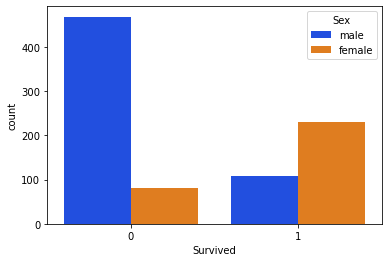

In [17]:
sns.countplot(x='Survived',data=train_data,hue='Sex',palette='bright') 
plt.show()

- here we can see that surviving rate of female is more then male.

In [30]:
def visualize(col, classname, figsize1, figsize2):
    # Class distribution
    class_distribution=train_data[col].value_counts(normalize=True)
    plt.figure(figsize=figsize1)
    plt.pie(class_distribution,
            labels=class_distribution.index,
            autopct='%.2f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1}
           )
    plt.title(f'{classname} Distribution')
    plt.axis('equal')
    plt.show()

    # Survival rate by Passenger class
    survival_rate = round(train_data.groupby(col)['Survived'].mean()*10000)/100
    plt.figure(figsize=figsize2)
    ax=sns.barplot(x=survival_rate.index,
                y=survival_rate.values,
                palette='bright'
               )
    ax.bar_label(ax.containers[0])
    plt.title(f'Survival Rate by {classname}')
    plt.xlabel(classname)
    plt.ylabel('Survival Rate (%)')
    plt.ylim(0, 100)
    plt.show()

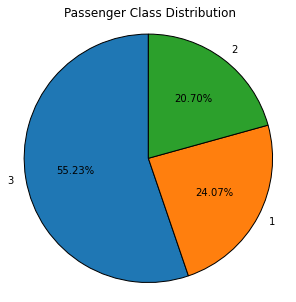

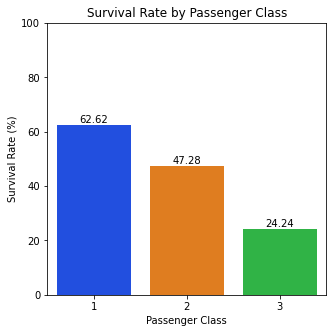

In [31]:
visualize('Pclass', 'Passenger Class', (5,5), (5,5))

- here we can see that approximately 55% of passengers belongs to pasenger class 3 and 62.62% passengers are survived.

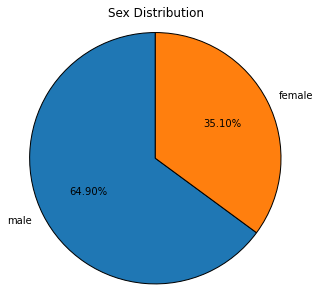

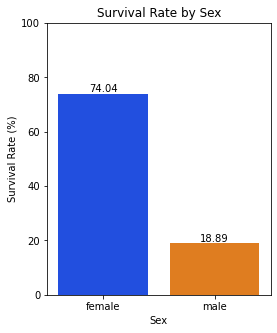

In [32]:
visualize('Sex', 'Sex', (5,5), (4,5))

- Here the dataset consists of approximetly 65% males and 35% females
- surviving rate of female is more than male which is 74%.

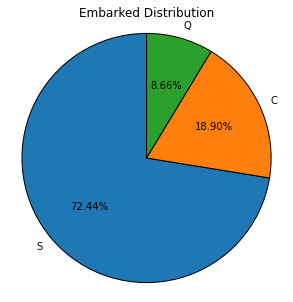

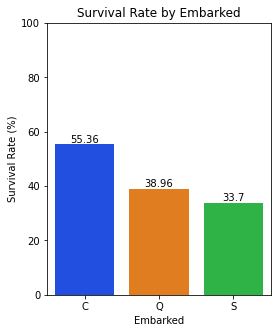

In [33]:
visualize('Embarked', 'Embarked', (5,5), (4,5))

- Most of the passengers are from "S" emarked which is 72%.
- The survival rate of people of “S” Embarks is higher than all other Embarks.

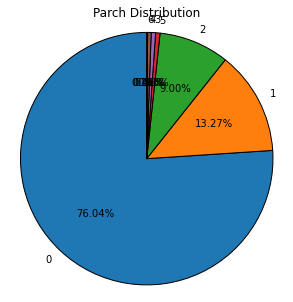

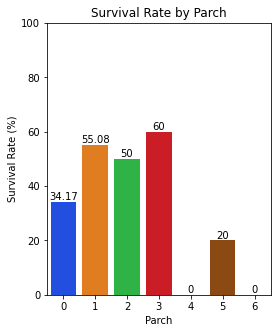

In [34]:
visualize('Parch', 'Parch', (5,5), (4,5))

- 76% people was not travelling with their family.
- 60% people was survived who have 3 family members.

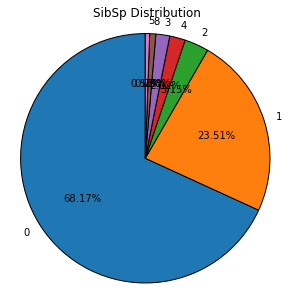

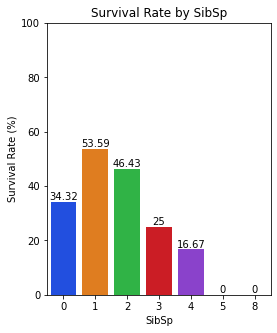

In [35]:
visualize('SibSp', 'SibSp', (5,5), (4,5))

- 68% people was not travelling with their siblings.
- 53.59% people survived who had 1 siblings and 46% survived who has 2 siblings.

In [36]:
((train_data['Fare']//5+1)*5).astype(int)

0      10
1      75
2      10
3      55
4      10
       ..
886    15
887    35
888    25
889    35
890    10
Name: Fare, Length: 889, dtype: int32

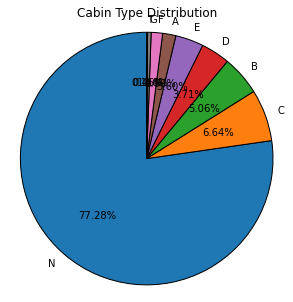

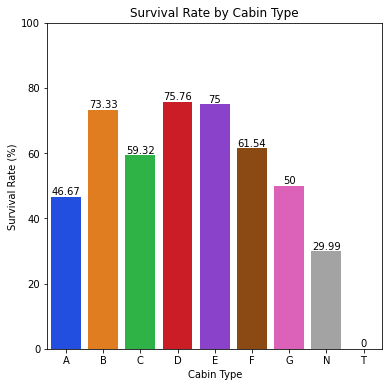

In [37]:
train_data['Cabin']=train_data['Cabin'].str[0]
test_data['Cabin']=test_data['Cabin'].str[0]
visualize('Cabin', 'Cabin Type', (5,5), (6,6))

In [39]:
dataset.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


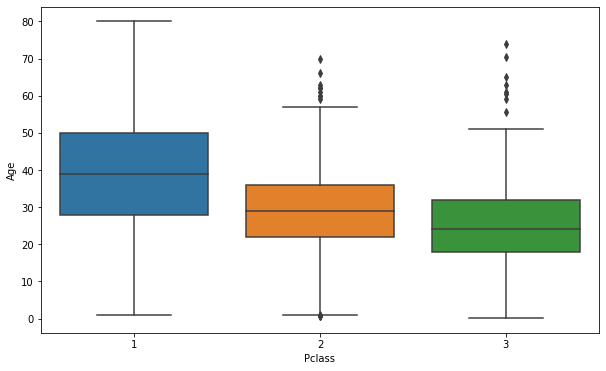

In [46]:
plt.figure(figsize = (10,6))
sns.boxplot(data=data,x='Pclass',y='Age')
plt.show()

In [19]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


In [20]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

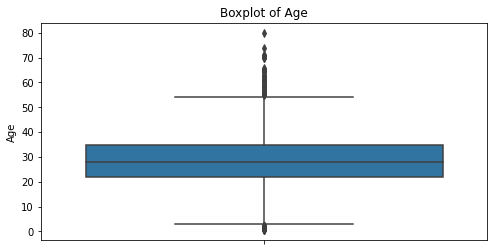

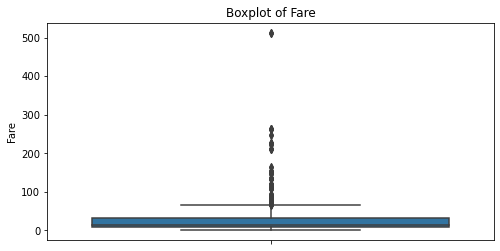

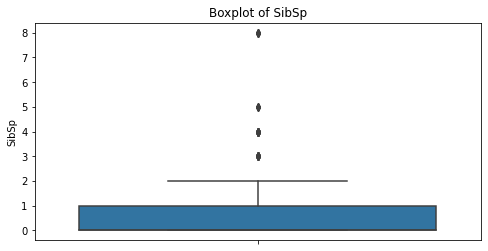

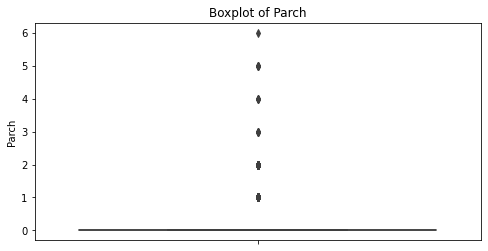

In [22]:
# BoxPlots to identify potential outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=train_data[feature].dropna())
    plt.title(f'Boxplot of {feature}')
    plt.show()

- Here we can see that 'Age', 'Fare', 'SibSp' and 'Parch' has some outliers.